<a href="https://colab.research.google.com/github/shahad-jeza/kaust_training/blob/main/summer_basic_code/RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


(19, 15, 3)
Training finished.

Average reward per thousand episodes
1000 :  -199.9999999999972
2000 :  -197.16199999999827
3000 :  -185.18599999999873
4000 :  -181.83799999999914
5000 :  -167.57199999999912
6000 :  -175.4969999999996
7000 :  -173.74299999999923
8000 :  -162.33899999999954
9000 :  -164.13399999999984
10000 :  -164.35099999999906


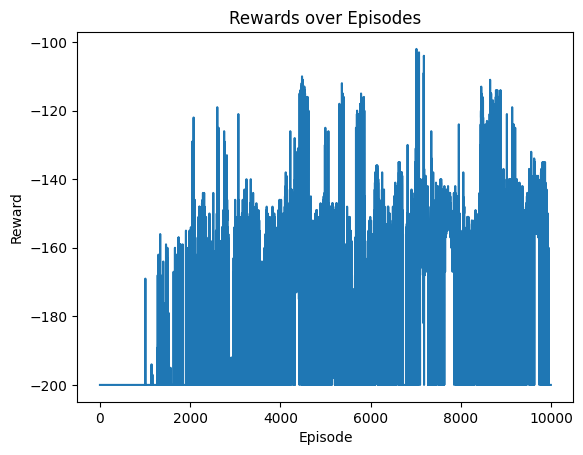

In [1]:
# Task 1: Install Required Libraries (5 minutes)
!pip install gym numpy matplotlib pandas kaggle

# Task 2: Set up Kaggle API (5 minutes)
import os


# Task 3: Import Libraries (5 minutes)
import gym
import numpy as np
import matplotlib.pyplot as plt

# Task 4: Initialize Environment (5 minutes)
# TODO: Initialize the 'MountainCar-v0' environment
env = gym.make('MountainCar-v0')

# Task 5: Initialize Q-table (10 points)
# TODO: Initialize the Q-table with zeros
state_size = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
state_size = np.round(state_size, 0).astype(int) + 1
action_size = env.action_space.n
q_table = np.zeros((*state_size, action_size))
print(q_table.shape)

# Task 6: Define Hyperparameters (10 points)

learning_rate = 0.1
discount_rate = 0.99
exploration_rate = 1.0
max_exploration_rate = 1.0
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

# Helper function to discretize states
def discretize_state(state):
    discrete_state = (state - env.observation_space.low) * np.array([10, 100])
    return tuple(np.round(discrete_state, 0).astype(int))

# Task 7: Implement Q-learning Algorithm
num_episodes = 10000
max_steps_per_episode = 200

rewards_all_episodes = []

for episode in range(num_episodes):
    state = discretize_state(env.reset())
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):
        # TODO: Implement Exploration-exploitation trade-off
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state])
        else:
            action = env.action_space.sample()

        # Take action and observe reward
        new_state, reward, done, _ = env.step(action)
        new_state = discretize_state(new_state)

        # TODO: Update Q-table using the Q-learning update rule
        q_table[state][action] = q_table[state][action] * (1 - learning_rate) + \
                                 learning_rate * (reward + discount_rate * np.max(q_table[new_state]))

        state = new_state
        rewards_current_episode += reward

        if done:
            break

    # TODO: Decay the exploration rate
    exploration_rate = min_exploration_rate + \
                       (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

    rewards_all_episodes.append(rewards_current_episode)

print("Training finished.\n")

# Task 8: Evaluate the Policy (20 points)
# TODO: Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes/1000)
count = 1000

print("Average reward per thousand episodes")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

# Task 9: Visualize the Policy (30 points)
# TODO: Plot the rewards over episodes
plt.plot(rewards_all_episodes)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards over Episodes')
plt.show()



In [2]:
!pip install imageio


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


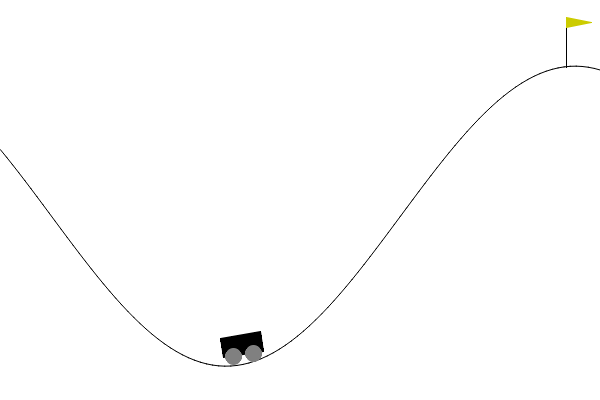

In [3]:
import gym
import imageio
import numpy as np
from IPython.display import Image

# Create environment
env = gym.make('MountainCar-v0')

# Helper function to create an animation from frames
def save_frames_as_gif(frames, path='./', filename='gym_animation.gif'):
    # Save frames as a gif
    imageio.mimsave(path + filename, frames, duration=1/30)

# Initialize the environment
env.reset()
frames = []

# Run the trained agent
state = discretize_state(env.reset())
done = False
for step in range(200):
    frames.append(env.render(mode='rgb_array'))
    action = np.argmax(q_table[state])
    state, reward, done, info = env.step(action)
    state = discretize_state(state)
    if done:
        break

# Close the environment
env.close()

# Save the frames as a gif
save_frames_as_gif(frames)

# Display the gif
with open('gym_animation.gif','rb') as f:
    display(Image(data=f.read(), format='png'))




---



# DQN

Training finished.

Average reward per thousand episodes
1000 :  -19.99999999999996
2000 :  -19.99999999999996
3000 :  -19.99999999999996
4000 :  -19.99999999999996
5000 :  -19.99999999999996
6000 :  -19.925999999999963
7000 :  -19.99999999999996
8000 :  -19.99999999999996
9000 :  -19.99999999999996
10000 :  -19.99999999999996
11000 :  -19.99999999999996
12000 :  -19.99999999999996
13000 :  -19.99999999999996
14000 :  -19.99999999999996
15000 :  -19.99999999999996
16000 :  -19.99999999999996
17000 :  -19.99999999999996
18000 :  -19.99999999999996
19000 :  -19.99999999999996
20000 :  -19.99999999999996
21000 :  -19.99999999999996
22000 :  -19.99999999999996
23000 :  -19.99999999999996
24000 :  -19.99999999999996
25000 :  -19.99999999999996
26000 :  -19.99999999999996
27000 :  -19.99999999999996
28000 :  -19.907999999999962
29000 :  -19.99999999999996
30000 :  -19.99999999999996
31000 :  -19.99999999999996
32000 :  -19.99999999999996
33000 :  -19.99999999999996
34000 :  -19.9999999999999

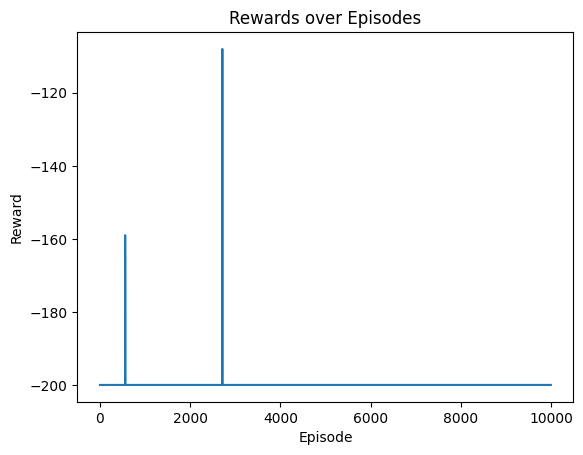

In [9]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


env = gym.make('MountainCar-v0')

# Task 5: Define the Neural Network Model
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        # TODO: Define the neural network layers
        self.fc1 = nn.Linear(state_size, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_size)

    def forward(self, x):
        # TODO: Implement the forward pass
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Task 6: Initialize Hyperparameters (10 points)
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
q_network = DQN(state_size, action_size)

# TODO: Define learning_rate
learning_rate = 0.001
optimizer = optim.Adam(q_network.parameters(), lr=learning_rate)

# TODO: Define discount_rate
discount_rate = 0.99

# TODO: Define exploration_rate
exploration_rate = 1.0

# TODO: Define max_exploration_rate
max_exploration_rate = 1.0

# TODO: Define min_exploration_rate
min_exploration_rate = 0.01

# TODO: Define exploration_decay_rate
exploration_decay_rate = 0.995

# TODO: Define number of episodes and max steps per episode
num_episodes = 10000
max_steps_per_episode = 200

# Task 7: Implement the DQN Algorithm (30 points)
rewards_all_episodes = []

for episode in range(num_episodes):
    state = env.reset()
    state = torch.FloatTensor(state).unsqueeze(0)
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):
        # TODO: Implement Exploration-exploitation trade-off
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            with torch.no_grad():
                action = torch.argmax(q_network(state)).item()
        else:
            action = env.action_space.sample()

        # Take action and observe reward
        new_state, reward, done, _ = env.step(action)
        new_state = torch.FloatTensor(new_state).unsqueeze(0)

        # TODO: Update Q-network
        target = reward + (1 - done) * discount_rate * torch.max(q_network(new_state)).item()
        current = q_network(state)[0][action]
        loss = nn.MSELoss()(current, torch.FloatTensor([target]))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        state = new_state
        rewards_current_episode += reward

        if done:
            break

    # TODO: Decay the exploration rate
    exploration_rate = max(min_exploration_rate, exploration_rate * exploration_decay_rate)

    rewards_all_episodes.append(rewards_current_episode)

print("Training finished.\n")

# Task 8: Evaluate the Policy (20 points)
# TODO: Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes/100)
count = 1000

print("Average reward per thousand episodes")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

# Task 9: Visualize the Policy (30 points)
# TODO: Plot the rewards over episodes
plt.plot(rewards_all_episodes)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards over Episodes')
plt.show()



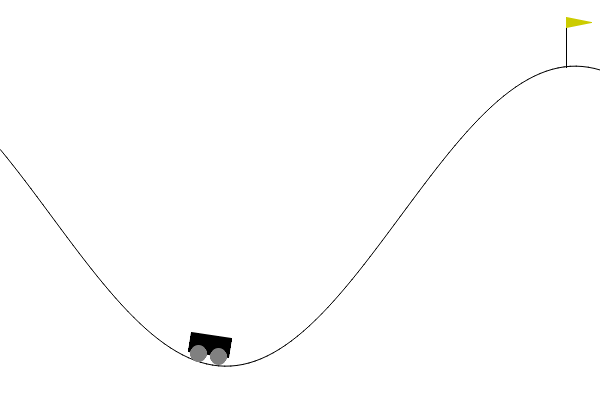

In [8]:
# Task 10: Visualize the Game (20 points)
import imageio
from IPython.display import Image

# Helper function to create an animation from frames
def save_frames_as_gif(frames, path='./', filename='gym_animation.gif'):
    # Save frames as a gif
    imageio.mimsave(path + filename, frames, duration=1/30)

# Initialize the environment
env.reset()
frames = []

# Run the trained agent
state = env.reset()
state = torch.FloatTensor(state).unsqueeze(0)
done = False

for step in range(max_steps_per_episode):
    frames.append(env.render(mode='rgb_array'))
    with torch.no_grad():
        action = torch.argmax(q_network(state)).item()
    new_state, reward, done, _ = env.step(action)
    state = torch.FloatTensor(new_state).unsqueeze(0)
    if done:
        break

# Close the environment
env.close()

# Save the frames as a gif
save_frames_as_gif(frames)

# Display the gif
with open('gym_animation.gif','rb') as f:
    display(Image(data=f.read(), format='png'))